Calculate variance (unbiased sample variance), standart deviation and outlier in one of your datasets. Approximate values after outlier deletion. Visualize results (was/now).

# Importind data 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
data = pd.read_csv("../data/mall_customers.csv")

In [3]:
display(data.sample(5))

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
78,79,Female,23,54,52
118,119,Female,51,67,43
4,5,Female,31,17,40
72,73,Female,60,50,49
145,146,Male,28,77,97


# Visualizing data 

Drawing histograms.

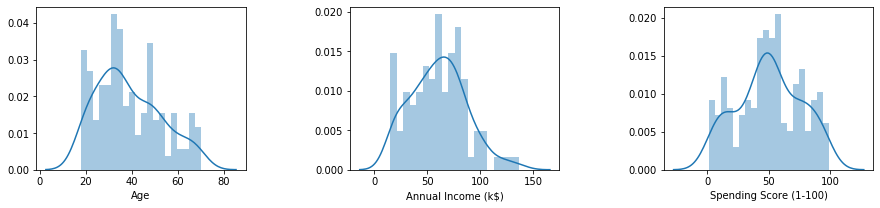

In [4]:
plt.figure(1 , figsize = (15 , 3))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(data[x] , bins = 20)
plt.show()

# Analyzing annual income distribution 

In [5]:
def calculate_deviations(arr, k):
    """
    Args:
        arr (list): List to count characteristics of.
        k (int): coefficent for range control.
    """


    # Mean.
    mean = np.mean(arr)
    print("Mean = {:.1f}".format(mean))

    # Variance.
    variance = np.var(arr, ddof=1)
    print("Variance = {:.1f}".format(variance))

    # Standart deviation.
    deviation = np.std(arr, ddof=1)
    print("Deviation = {:.1f}".format(deviation))

    # Range control.
    interval_border_min = mean - k * deviation
    interval_border_max = mean + k * deviation
    print("Standart deviation borders: from {:.1f} to {:.1f}".format(interval_border_min,
                                                                     interval_border_max))

    return mean, variance, deviation, (interval_border_min, interval_border_max)

Values distribution before replacing outliers with mean.

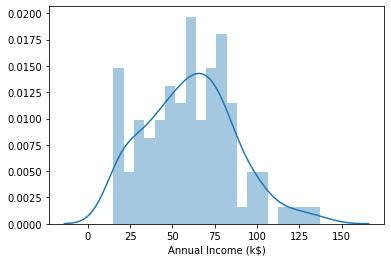

In [6]:
sns.distplot(data["Annual Income (k$)"], bins=20)
plt.show()

In [7]:
mean, _, _, interval = calculate_deviations(arr=data["Annual Income (k$)"], 
                                            k=2)

Mean = 60.6
Variance = 689.8
Deviation = 26.3
Standart deviation borders: from 8.0 to 113.1


Values distribution after replacing outliers with mean.

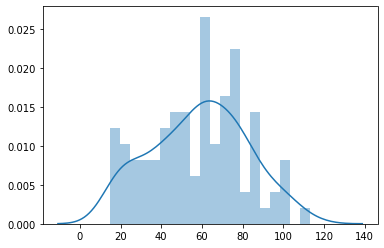

In [8]:
sns.distplot([mean if ((i < interval[0]) | (i > interval[1])) else i for i in data["Annual Income (k$)"]], bins=20)
plt.show()